<a href="https://colab.research.google.com/github/satyamnewale/numpy-notebooks/blob/main/linear_regression_from_scratch_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 41.25619064583805
200 1.008373187966133
400 0.9925572568907094
600 0.9924395315802391
800 0.9924386552961522
1000 0.9924386487735632
1200 0.9924386487250125
1400 0.9924386487246512
1600 0.9924386487246486
1800 0.9924386487246486
2000 0.9924386487246484
2200 0.9924386487246486
2400 0.9924386487246482
2600 0.9924386487246488
2800 0.9924386487246486
3000 0.9924386487246486
3200 0.9924386487246486
3400 0.9924386487246486
3600 0.9924386487246486
3800 0.9924386487246486
4000 0.9924386487246486
4200 0.9924386487246486
4400 0.9924386487246486
4600 0.9924386487246486
4800 0.9924386487246486
3.3306690738754696e-16


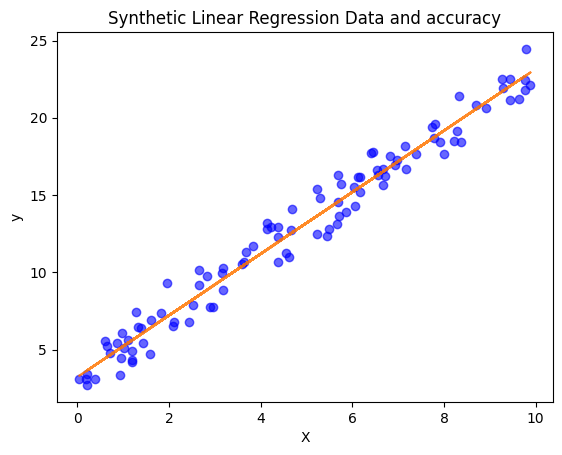

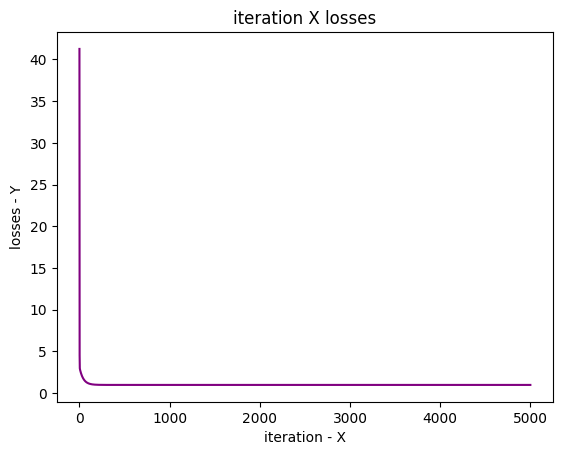

In [101]:
import numpy as np

#1. generate feature data (X)
np.random.seed(0)
X =np.random.rand(100,1)*10

# slope and constant
a=2
b=3

#generate noise
noise = np.random.randn(100,1)

#generate target value
Y = a*X + b + noise

#2. form design matrix
X_design = np.hstack((np.ones((100, 1)), X))
isValid = X_design.T @ X_design

# Normal equation
beta = np.linalg.inv(isValid)@X_design.T@Y
y_pred = X_design @ beta

#plotting and MSE
MSE = np.mean((Y-y_pred)**2)

#weight and gradient
w = np.random.randn(2,1)*0.01
y_hat = X_design @ w
gradient = (2/100)*X_design.T@(y_hat-Y)

#learning rate and losses store
lr = 0.023
n_iters = 5000
losses = []

#iteration
for i in range(n_iters):
  y_h = X_design @ w
  error = y_h - Y
  g = (2/100)*X_design.T@(y_h-Y)
  w = w - lr * g
  loss = np.mean((Y - (X_design @ w))**2)
  losses.append(loss)
  if i % 200 == 0:
    print(i, loss)

#compare
absolute_difference = w - beta
y_pred_gd = X_design @ w
MSE_hat = np.mean((Y-y_pred_gd)**2)

#final MSE
MSE_final = MSE_hat - MSE
print(MSE_final)

plt.scatter(X, Y, color='blue', alpha=0.6)
plt.plot(X, y_pred, color='red', alpha=0.6)
plt.plot(X, y_pred_gd, color='orange', alpha=0.6)

plt.title("Synthetic Linear Regression Data and accuracy")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

plt.plot(range(n_iters), losses, color='purple')
plt.title("iteration X losses")
plt.xlabel("iteration - X")
plt.ylabel("losses - Y")
plt.show()